In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [259]:
train_df=pd.read_csv('train_LZV4RXX.csv')


In [260]:
df=train_df.drop(columns=['loan_id'])

In [261]:
df.drop_duplicates()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1.0,Aadhar,504264,820920,2,2,0,0
1,48,1.0,Aadhar,728556,831444,6,2,0,0
2,30,2.0,VoterID,642936,826092,0,0,0,1
3,28,1.0,Aadhar,746556,930924,0,0,0,0
4,29,1.0,Aadhar,1139880,1902000,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6995,45,2.0,Aadhar,930948,1258344,0,0,0,1
6996,41,2.0,Aadhar,681108,791040,4,4,0,1
6997,47,2.0,Aadhar,627636,720336,35,11,0,1
6998,39,1.0,Aadhar,654708,793860,0,0,0,1


In [262]:
train_df['ratio_loan']=train_df['loan_amount'].div(train_df['asset_cost'])

In [263]:
train_df['prev_loan']=train_df['no_of_loans']-train_df['no_of_curr_loans']

In [264]:
train_df.shape

(7000, 12)

In [265]:
train_df.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,ratio_loan,prev_loan
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0,0.614267,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0,0.876254,4
2,3,30,2.0,VoterID,642936,826092,0,0,0,1,0.778286,0
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0,0.801952,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0,0.599306,0


In [266]:
# getting information about columns
train_df.info()
#there in null value in education column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
 10  ratio_loan        7000 non-null   float64
 11  prev_loan         7000 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 656.4+ KB


In [267]:
#Checking for imbalance data
train_df['loan_default'].value_counts().div(train_df.shape[0])

0    0.6
1    0.4
Name: loan_default, dtype: float64

In [268]:
#checking categorical value for proof_submitted
train_df['proof_submitted'].unique()

array(['Aadhar', 'VoterID', 'Driving', 'PAN', 'Passport'], dtype=object)

In [269]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,7000.0,3500.500000,2020.870275,1.000000,1750.75000,3500.500000,5250.250000,7.000000e+03
age,7000.0,36.096571,7.587700,21.000000,29.00000,36.000000,43.000000,5.000000e+01
education,6755.0,1.561954,0.496184,1.000000,1.00000,2.000000,2.000000,2.000000e+00
loan_amount,7000.0,663355.172571,149812.773669,167880.000000,577788.00000,657108.000000,737364.000000,1.781376e+06
asset_cost,7000.0,916299.750857,214492.244573,473352.000000,797901.00000,858426.000000,957675.000000,2.419200e+06
no_of_loans,7000.0,2.853286,5.471932,0.000000,0.00000,0.000000,3.000000,1.090000e+02
no_of_curr_loans,7000.0,1.371143,2.189278,0.000000,0.00000,0.000000,2.000000,3.300000e+01
last_delinq_none,7000.0,0.013286,0.114504,0.000000,0.00000,0.000000,0.000000,1.000000e+00
loan_default,7000.0,0.400000,0.489933,0.000000,0.00000,0.000000,1.000000,1.000000e+00
ratio_loan,7000.0,0.731419,0.111215,0.207875,0.67451,0.753205,0.815745,9.334798e-01


In [270]:
numerical_column=[i for i in train_df.columns if train_df[i].dtypes!='O']

In [271]:
#showing mean of defaulted loan by proof_id
train_df.groupby(['proof_submitted']).mean()['loan_default']

proof_submitted
Aadhar      0.389142
Driving     0.464912
PAN         0.412766
Passport    0.230769
VoterID     0.479491
Name: loan_default, dtype: float64

In [272]:
train_df['proof_submitted'].value_counts()/train_df.shape[0]

Aadhar      0.847286
VoterID     0.101000
PAN         0.033571
Driving     0.016286
Passport    0.001857
Name: proof_submitted, dtype: float64

In [273]:
#showing mean of defaulted loan by proof_id
train_df.groupby(['last_delinq_none']).mean()['loan_default']

last_delinq_none
0    0.399160
1    0.462366
Name: loan_default, dtype: float64

In [274]:
numerical_column

['loan_id',
 'age',
 'education',
 'loan_amount',
 'asset_cost',
 'no_of_loans',
 'no_of_curr_loans',
 'last_delinq_none',
 'loan_default',
 'ratio_loan',
 'prev_loan']

<AxesSubplot:>

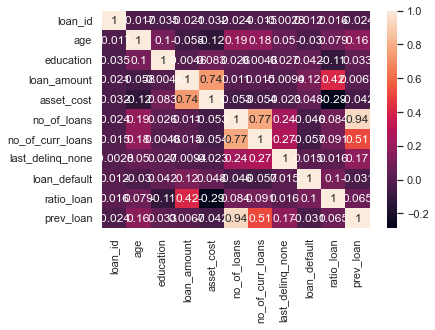

In [275]:
sns.heatmap(train_df.corr(),annot=True)

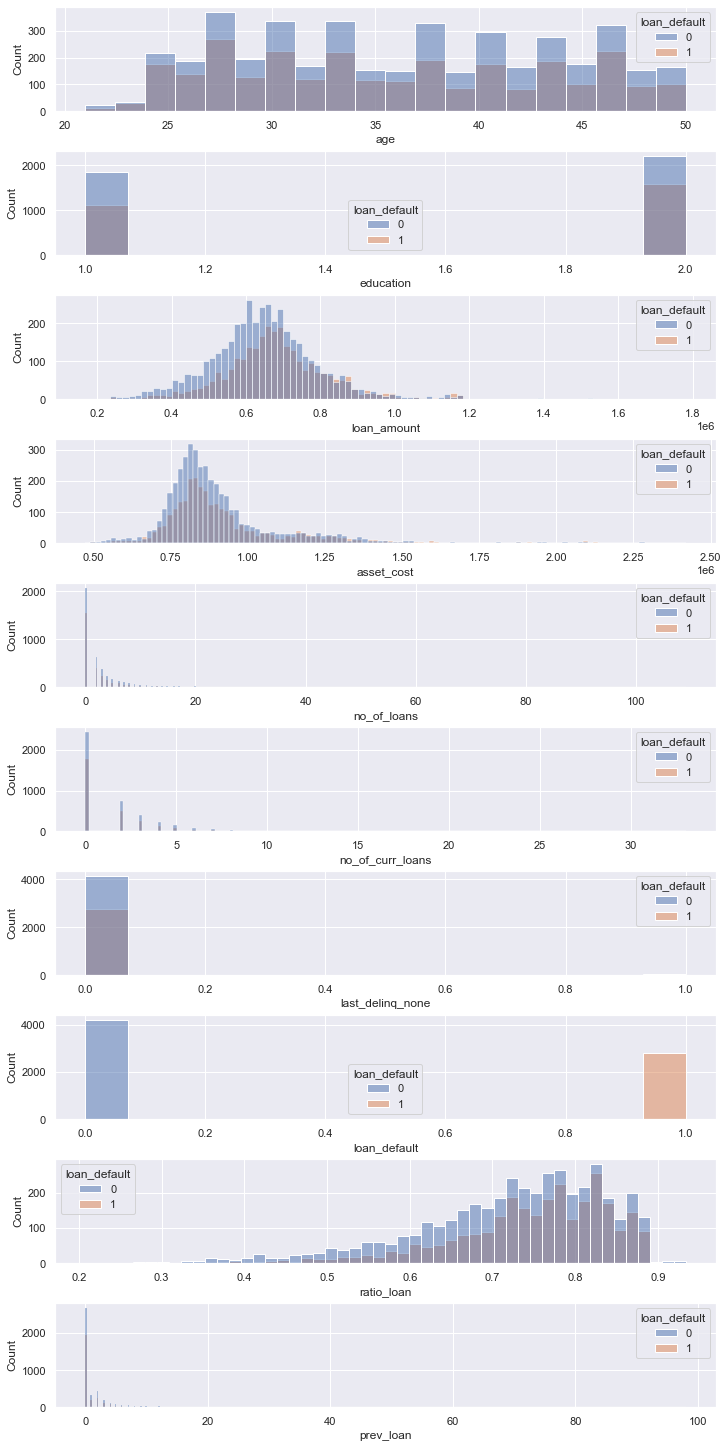

In [276]:
#EDA PART
count=0
fig,ax=plt.subplots(10,figsize=(10,20),constrained_layout=True)
for i in numerical_column[1:]:
    sns.histplot(x=i,data=train_df,ax=ax[count],hue=train_df['loan_default'])
    count+=1

C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

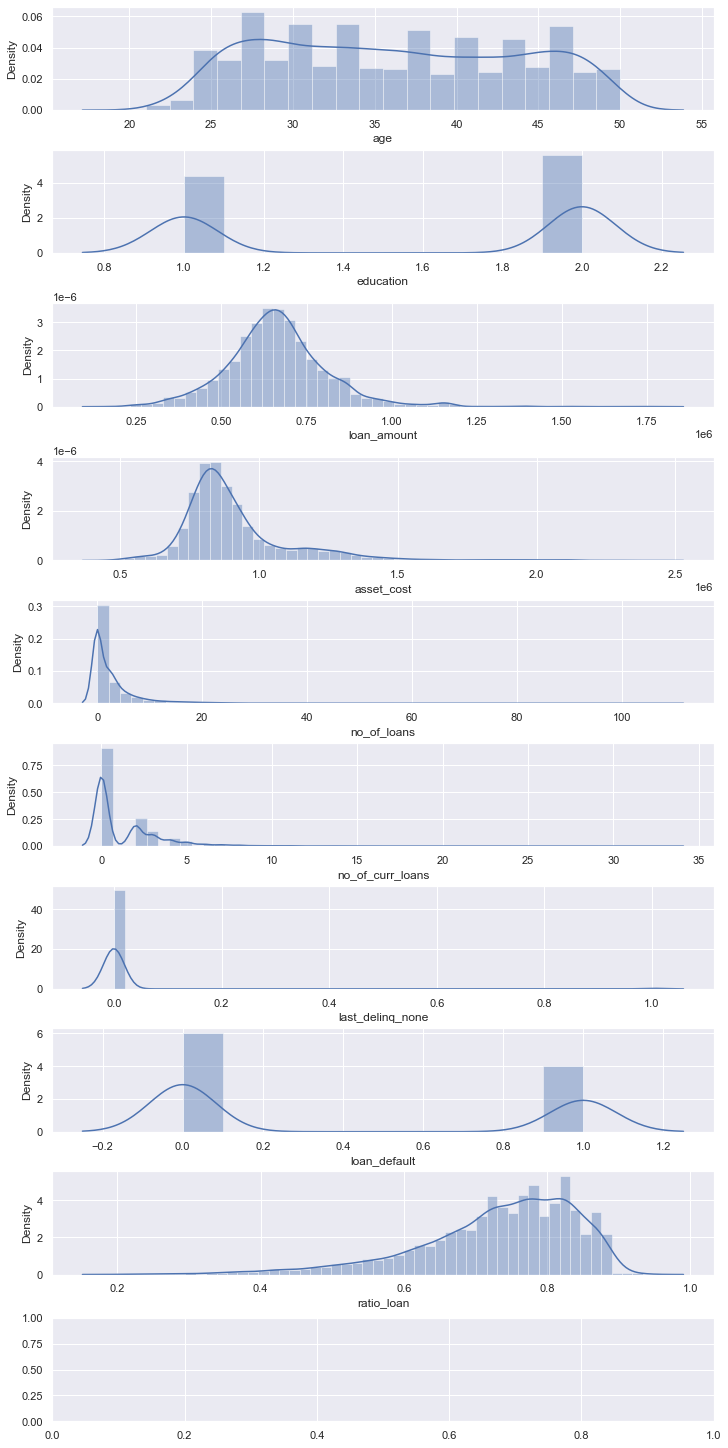

In [277]:
count=0
fig,ax=plt.subplots(10,figsize=(10,20),constrained_layout=True)
for i in numerical_column[1:-1]:
    sns.distplot(train_df[i],ax=ax[count])
    count+=1

C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

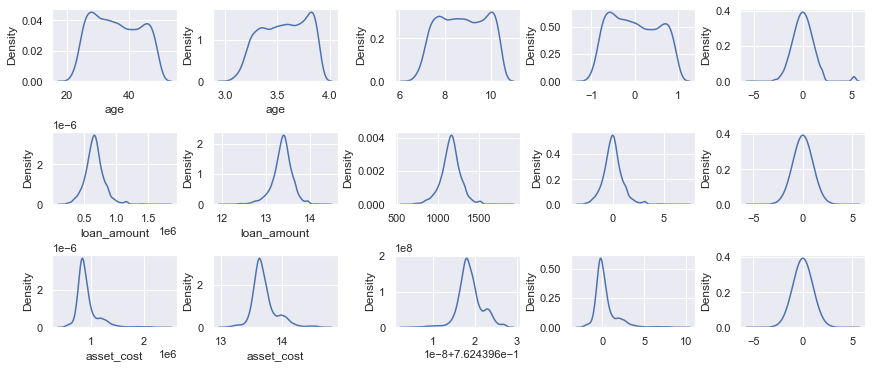

In [278]:
from scipy import stats
from sklearn.preprocessing import RobustScaler,QuantileTransformer
count=0
fig,ax=plt.subplots(3,5,constrained_layout=True,figsize=(12,5))
for i in ['age','loan_amount','asset_cost']:
    sns.distplot(train_df[i],ax=ax[count,0],hist=False)
    sns.distplot(np.log(train_df[i]),ax=ax[count,1],hist=False)
    sns.distplot(stats.yeojohnson(train_df[i])[0],ax=ax[count,2],hist=False)
    sns.distplot(RobustScaler(quantile_range=(25,75)).fit_transform(train_df[[i]]),ax=ax[count,3],hist=False)
    sns.distplot(QuantileTransformer(output_distribution='normal').fit_transform(train_df[[i]]),ax=ax[count,4],hist=False)
    count+=1

In [279]:
train_df['age']=pd.cut(x=train_df['age'],bins=[20,30,40,50],labels=['20','30','40'])
train_df['age']

0       20
1       40
2       20
3       20
4       20
        ..
6995    40
6996    40
6997    40
6998    30
6999    30
Name: age, Length: 7000, dtype: category
Categories (3, object): ['20' < '30' < '40']

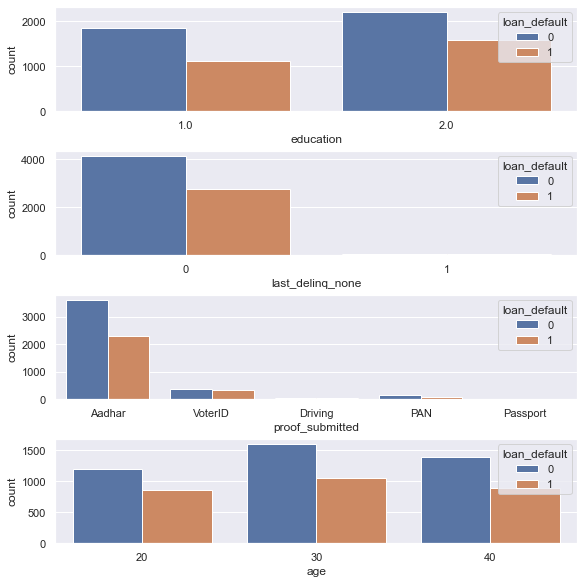

In [280]:
count=0
fig,ax=plt.subplots(4,figsize=(8,8),constrained_layout=True)
for i in train_df[['education','last_delinq_none','proof_submitted','age']].columns:
    sns.countplot(x=i,data=train_df[['education','last_delinq_none','loan_default','proof_submitted','age']],ax=ax[count],hue='loan_default')
    count+=1

<AxesSubplot:xlabel='asset_cost'>

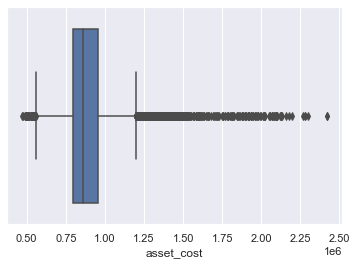

In [281]:
sns.boxplot(x=train_df['asset_cost'])

<AxesSubplot:xlabel='loan_amount'>

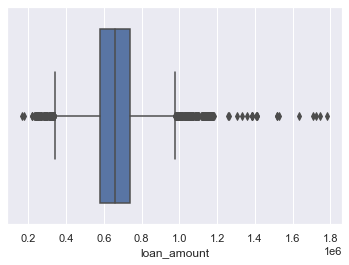

In [282]:
sns.boxplot(x=train_df['loan_amount'])

In [283]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,KNNImputer,IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import f1_score



In [284]:
train_df['proof_submitted'].unique()

array(['Aadhar', 'VoterID', 'Driving', 'PAN', 'Passport'], dtype=object)

In [285]:
def convert(col):
    if col=='Aadhar':
        return 0
    if col=='VoterID':
        return 1
    if col=='Driving':
        return 2
    if col=="Passport":
        return 3
    if col=='PAN':
        return 4
train_df['proof_submitted']=train_df['proof_submitted'].apply(convert) 
  

In [286]:
train_df.columns

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none',
       'loan_default', 'ratio_loan', 'prev_loan'],
      dtype='object')

In [287]:
y=train_df['loan_default']
train_df.drop(columns=['loan_default'],inplace=True)

In [288]:
train_df.isnull().sum()

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
ratio_loan            0
prev_loan             0
dtype: int64

In [289]:
train_df.drop(columns=['loan_id'],inplace=True)

In [290]:
new_numerical_column=['loan_amount','no_of_loans','ratio_loan','prev_loan']
categorical_column=['proof_submitted','age','education','last_delinq_none']
num_pipeline = Pipeline(steps=[
                ('scale',QuantileTransformer(output_distribution='normal'))
            ]
            )
cat_pipeline = Pipeline(steps=[('imputer', KNNImputer()),
                 ('one_hot_encoder', OneHotEncoder())])
preprocessing = ColumnTransformer([
                ('num_pipeline', num_pipeline, new_numerical_column),
                ('cat_pipeline', cat_pipeline, categorical_column),
            ])
tansformed=preprocessing.fit_transform(train_df,y)


In [291]:
X_train,X_test,Y_train,Y_test=train_test_split(tansformed,y,random_state=42,test_size=0.25,stratify=y)

In [292]:
from xgboost import XGBClassifier

In [293]:
m=XGBClassifier(n_estimators=300,random_state=42)
m.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [294]:
train_df.columns

Index(['age', 'education', 'proof_submitted', 'loan_amount', 'asset_cost',
       'no_of_loans', 'no_of_curr_loans', 'last_delinq_none', 'ratio_loan',
       'prev_loan'],
      dtype='object')

In [295]:
test_df=pd.read_csv('test_4zJg83n.csv')
test_df['proof_submitted']=test_df['proof_submitted'].apply(convert)
test_df['ratio_loan']=test_df['loan_amount'].div(test_df['asset_cost'])
test_df['prev_loan']=test_df['no_of_loans']-test_df['no_of_curr_loans']
loan_id=test_df['loan_id']
test_df['age']=pd.cut(x=test_df['age'],bins=[20,30,40,50],labels=['20','30','40'])
test_df.drop(columns=['loan_id'],inplace=True)
transformed_test=preprocessing.transform(test_df)
pred=m.predict(transformed_test)

In [296]:
pred

array([1, 0, 1, ..., 0, 0, 1])

In [297]:
submission=pd.DataFrame(np.array([loan_id,pred]).T,columns=['loan_id','loan_default'])
submission.to_csv('sample_submission.csv',index=False)